# Pregunta 1

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('qog_std_cs_jan18.csv')

In [4]:
df_submuestra = df.sample(int(df.shape[0]/2), random_state=27)[['undp_hdi','ccodealp','ht_region','gle_cgdpc', 'imf_pop', 'ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']]

In [5]:
df_submuestra['region_recod'] = df_submuestra['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem', 'EastAsia', 'SouthEastAsia','SouthAsia','Pacific', 'Caribbean' ])

In [8]:
df_submuestra.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,region_recod
9,0.892,AUT,5,38868.0390,8.544000,1.5,4.492075,5.49955,NaN,WesternDem
12,0.575,BGD,8,1796.6400,154.695007,7.5,3.293150,1.95726,57.239899,SouthAsia
117,0.795,OMN,3,26158.7300,3.717000,1.9,3.535049,4.96038,94.329842,NorthAfrica
77,0.686,IDN,7,4780.0098,252.164993,6.3,4.464125,3.27861,75.018372,SouthEastAsia
63,0.450,GMB,4,1601.8800,NaN,7.7,4.276581,2.76771,NaN,SubSaharian


# Pregunta 2

In [9]:
def pregunta2(df): 
    for date, row in df.iteritems():
        print('\n---'+date+'---')
        print(df[date].describe())
        
pregunta2(df_submuestra[['gle_cgdpc' , 'undp_hdi' , 'imf_pop']])


---gle_cgdpc---
count        96.000000
mean      15883.982812
std       17865.289101
min         488.269990
25%        2976.932500
50%        9534.515150
75%       21956.875000
max      108481.130000
Name: gle_cgdpc, dtype: float64

---undp_hdi---
count    91.000000
mean      0.718264
std       0.148793
min       0.414000
25%       0.609000
50%       0.747000
75%       0.828500
max       0.938000
Name: undp_hdi, dtype: float64

---imf_pop---
count     74.000000
mean      31.714419
std       58.913717
min        0.011000
25%        1.466250
50%        7.048000
75%       32.576751
max      318.789001
Name: imf_pop, dtype: float64


# Pregunta 3

In [10]:
def pregunta3(df, var, print_list = False):
    total = df[var].count()
    count = df[var].isnull().sum()
    print("En " + var + "el numero de casos perdidos es " + str(count) ) 
    print("En " + var + "el porcentaje de casos perdidos es " + str(count/total*100) +"%")
    if (print_list):
        if (count > 0):
            print ('\nLos paises con valores perdidos son: ')
            print (df.loc[df[var].isnull()]['ccodealp'])
        else:
            print ('\nNo hay datos perdidos ')
        
    

for aux in ['undp_hdi','ccodealp','ht_region','gle_cgdpc', 'imf_pop', 'ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']:
    print ('---------------' + aux + '------------------\n')
    pregunta3(df_submuestra,aux )
    print ('-------------------------------------------\n')

for aux in ['wdi_ners', 'wdi_expedu',  'wef_qes']:
    print ('---------------' + aux + '------------------\n')
    pregunta3(df_submuestra,aux, True)
    print ('-------------------------------------------\n')
    

---------------undp_hdi------------------

En undp_hdiel numero de casos perdidos es 6
En undp_hdiel porcentaje de casos perdidos es 6.593406593406594%
-------------------------------------------

---------------ccodealp------------------

En ccodealpel numero de casos perdidos es 0
En ccodealpel porcentaje de casos perdidos es 0.0%
-------------------------------------------

---------------ht_region------------------

En ht_regionel numero de casos perdidos es 0
En ht_regionel porcentaje de casos perdidos es 0.0%
-------------------------------------------

---------------gle_cgdpc------------------

En gle_cgdpcel numero de casos perdidos es 1
En gle_cgdpcel porcentaje de casos perdidos es 1.0416666666666665%
-------------------------------------------

---------------imf_pop------------------

En imf_popel numero de casos perdidos es 23
En imf_popel porcentaje de casos perdidos es 31.08108108108108%
-------------------------------------------

---------------ffp_hf-----------------

# Pregunta 4

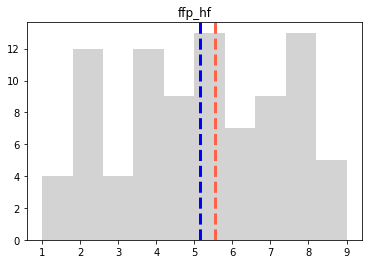

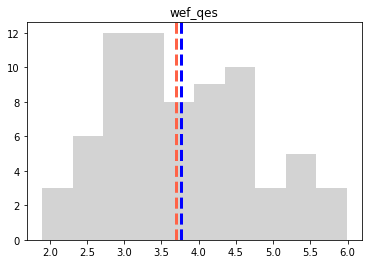

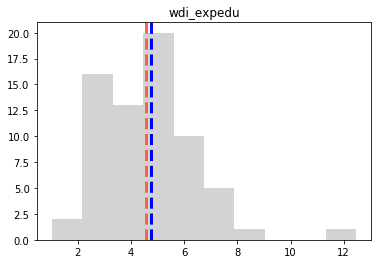

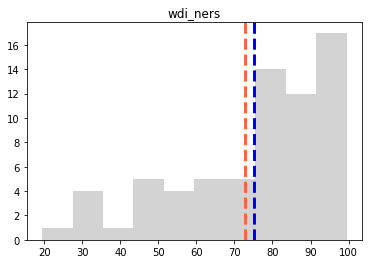

In [19]:
import matplotlib.pyplot as plt

def pregunta4(df_aux, var, true_mean, sample_mean = False) :
    plt.hist(df_aux[var].dropna(), color='lightgrey')
    plt.title(var)
    if (sample_mean):
        plt.axvline(df_aux[var].mean(),lw = 3,color = 'blue',linestyle = '--')
    if (true_mean):
        plt.axvline(df[var].mean(),lw = 3,color = 'tomato',linestyle = '--')
    plt.show()
    
for aux in ['ffp_hf', 'wef_qes', 'wdi_expedu', 'wdi_ners']:
    pregunta4(df_submuestra, aux, True, True)

# Pregunta 5

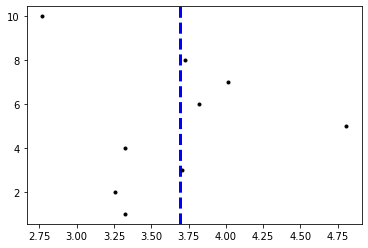

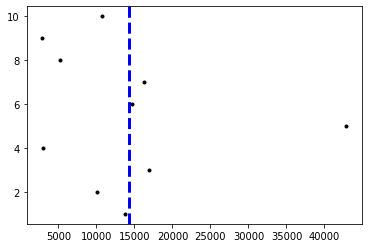

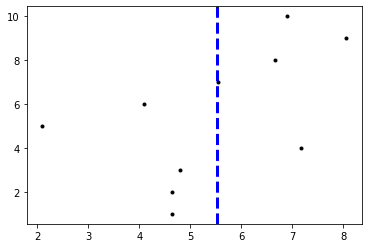

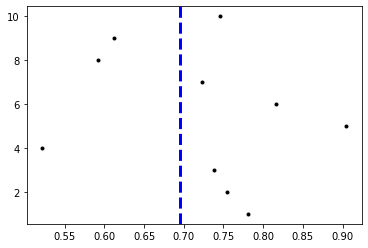

In [12]:
def pregunta5(dataframe, plot_var, plot_by, global_stat= False, statistic='mean'):
    if statistic=='mean' :
        data = dataframe.groupby(plot_by)[plot_var].mean().dropna()
    else: 
        data = dataframe.groupby(plot_by)[plot_var].median().dropna()
    
    if global_stat:
        plt.axvline(df[plot_var].dropna().mean(),lw = 3,color = 'blue',linestyle = '--')
    
    plt.plot(data.values, data.index, '.', color='black')
    plt.show()

for aux in ['wef_qes', 'gle_cgdpc', 'ffp_hf', 'undp_hdi']:
    pregunta5(df_submuestra, aux,'ht_region', True, 'mean')


# Pregunta 6

In [39]:
df_submuestra.to_csv('subsample_gacsm_demo.csv')